# Titanic - Machine Learning from Disaster

## Part 1 - Data Preprocessing
Data Preprocessing is a crucial step in logistic regression to ensure that the model performs optimally.

### Importing the Dataset
Begin by loading the dataset, typically with a library like Pandas. Data could be from CSV, SQL databases, or other formats.

In [197]:
# Import the pandas library, a powerful tool for data manipulation, preparation, and analysis.
import pandas as pd

# Load the training dataset for the logistic regression model.
dataset1 = pd.read_excel('train_cleaned.xlsx')
# dataset1 contains the cleaned training data loaded from 'train_cleaned.xlsx'

# Load the testing dataset for model evaluation and prediction.
dataset2 = pd.read_excel('test_cleaned.xlsx')
# dataset2 contains the cleaned test data loaded from 'test_cleaned.xlsx'

In [198]:
# Display an overview of dataset1, including column names, data types, non-null value counts, and memory usage.
dataset1.info()

# Note: Columns 8 and 9 contain null values due to data cleaning processes applied to those columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    int64  
 8   Age.1       714 non-null    float64
 9   Embarked.1  889 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 69.7 KB


In [199]:
# Display a summary of dataset2, including data types, non-null counts, and memory usage.
dataset2.info()

# Note: Columns 8, 9, and 10 contain null values due to data cleaning processes applied to those columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked    418 non-null    int64  
 7   Age.1       332 non-null    float64
 8   Embarked.1  418 non-null    int64  
 9   Fare.1      417 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 32.8 KB


### Getting the inputs and output
Separate your data into features (inputs) and the target variable (output) that the model will predict. In a dataset, this often means selecting all columns but one for features and the remaining column for the target.

In [200]:
# Display the first 10 rows of dataset1 to get a quick overview of the data structure and values.
dataset1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age.1,Embarked.1
0,0,3,1,22.0,1,0,7.2500,0,22.0,0.0
1,1,1,0,38.0,1,0,71.2833,1,38.0,1.0
2,1,3,0,26.0,0,0,7.9250,0,26.0,0.0
3,1,1,0,35.0,1,0,53.1000,0,35.0,0.0
4,0,3,1,35.0,0,0,8.0500,0,35.0,0.0
5,0,3,1,28.0,0,0,8.4583,2,NaN,2.0
6,0,1,1,54.0,0,0,51.8625,0,54.0,0.0
7,0,3,1,2.0,3,1,21.0750,0,2.0,0.0
8,1,3,0,27.0,0,2,11.1333,0,27.0,0.0
9,1,2,0,14.0,1,0,30.0708,1,14.0,1.0


In [201]:
# Display the first 10 rows of dataset2 to get a quick overview of the data structure and values.
dataset2.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age.1,Embarked.1,Fare.1
0,3,1,34.5,0,0,7.8292,2,34.5,2,7.8292
1,3,0,47.0,1,0,7.0000,0,47.0,0,7.0000
2,2,1,62.0,0,0,9.6875,2,62.0,2,9.6875
3,3,1,27.0,0,0,8.6625,0,27.0,0,8.6625
4,3,0,22.0,1,1,12.2875,0,22.0,0,12.2875
5,3,1,14.0,0,0,9.2250,0,14.0,0,9.2250
6,3,0,30.0,0,0,7.6292,2,30.0,2,7.6292
7,2,1,26.0,1,1,29.0000,0,26.0,0,29.0000
8,3,0,18.0,0,0,7.2292,1,18.0,1,7.2292
9,3,1,21.0,2,0,24.1500,0,21.0,0,24.1500


In [202]:
# Extract feature columns (columns 1 to 7) from dataset1 for training input variables and store them in X1.
X1 = dataset1.iloc[:, 1:8].values
# These columns represent the independent variables used to train the model.

# Extract feature columns (columns 1 to 6) from dataset2 for testing input variables and store them in X2.
X2 = dataset2.iloc[:, 0:7].values
# These columns represent the independent variables used to evaluate the model.

# Extract the target variable (column 0) from dataset1 for training and store it in y.
y = dataset1.iloc[:, 0].values
# This column contains the dependent variable, or labels, that the model will learn to predict.

# Note: dataset2 does not contain a target variable column since it is intended for testing only.

In [203]:
# Display the extracted training feature array (X1) to verify the input variables for the model.
X1

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  1.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    ,  0.    , 28.    , ...,  2.    , 23.45  ,  0.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  1.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  2.    ]])

In [204]:
# Display the extracted testing feature array (X2) to confirm the input variables for model evaluation.
X2

array([[ 3.    ,  1.    , 34.5   , ...,  0.    ,  7.8292,  2.    ],
       [ 3.    ,  0.    , 47.    , ...,  0.    ,  7.    ,  0.    ],
       [ 2.    ,  1.    , 62.    , ...,  0.    ,  9.6875,  2.    ],
       ...,
       [ 3.    ,  1.    , 38.5   , ...,  0.    ,  7.25  ,  0.    ],
       [ 3.    ,  1.    , 27.    , ...,  0.    ,  8.05  ,  0.    ],
       [ 3.    ,  1.    , 27.    , ...,  1.    , 22.3583,  1.    ]])

In [205]:
# Display the extracted target variable array (y) to review the output labels for the training data.
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### Creating the Training Set and the Test Set
Split the data into training and test sets to evaluate the model's performance. This is often done with an 80-20 or 70-30 split using train_test_split from Scikit-Learn.

In [206]:
# Import train_test_split from the sklearn.model_selection module to facilitate splitting datasets into training and testing subsets.
from sklearn.model_selection import train_test_split

# Split the feature array (X1) and target variable (y) into training and testing sets.
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)
# 80% of the data will be used for training, and 20% will be reserved for testing the model.
# random_state ensures reproducibility of the results.

# Split the feature array (X2) into training and testing sets.
X2_train, X2_test = train_test_split(X2, test_size=0.2, random_state=0)
# The same test size and random state are applied for consistency.

# Note: X2 does not have a target variable since it is for testing purposes only.

In [207]:
# Display the training feature array from the first dataset (X1) used for model training.
X1_train

array([[ 3.    ,  0.    , 28.    , ...,  2.    , 15.2458,  1.    ],
       [ 2.    ,  1.    , 31.    , ...,  0.    , 10.5   ,  0.    ],
       [ 2.    ,  1.    , 31.    , ...,  1.    , 37.0042,  1.    ],
       ...,
       [ 3.    ,  1.    , 28.    , ...,  0.    ,  7.7333,  2.    ],
       [ 3.    ,  0.    , 36.    , ...,  0.    , 17.4   ,  0.    ],
       [ 2.    ,  1.    , 60.    , ...,  1.    , 39.    ,  0.    ]])

In [208]:
# Display the testing feature array from the first dataset (X1) used for model evaluation.
X1_test

array([[  3.    ,   1.    ,  28.    , ...,   0.    ,  14.4583,   1.    ],
       [  3.    ,   1.    ,  28.    , ...,   0.    ,   7.55  ,   0.    ],
       [  3.    ,   1.    ,   7.    , ...,   1.    ,  29.125 ,   2.    ],
       ...,
       [  1.    ,   0.    ,  31.    , ...,   0.    , 113.275 ,   1.    ],
       [  3.    ,   1.    ,  23.    , ...,   0.    ,   7.8542,   0.    ],
       [  3.    ,   1.    ,  19.    , ...,   0.    ,   8.05  ,   0.    ]])

In [209]:
# Display the training feature array from the second dataset (X2) for model testing.
X2_train

array([[  1.   ,   1.   ,  55.   , ...,   0.   ,  59.4  ,   1.   ],
       [  1.   ,   1.   ,  30.   , ...,   2.   , 151.55 ,   0.   ],
       [  1.   ,   1.   ,  61.   , ...,   3.   , 262.375,   1.   ],
       ...,
       [  3.   ,   0.   ,   1.   , ...,   1.   ,  16.7  ,   0.   ],
       [  3.   ,   1.   ,  27.   , ...,   0.   ,   7.75 ,   2.   ],
       [  3.   ,   1.   ,  23.   , ...,   0.   ,  13.9  ,   0.   ]])

In [210]:
# Display the testing feature array from the second dataset (X2).
X2_test

array([[  3.    ,   1.    ,  14.5   ,   8.    ,   2.    ,  69.55  ,
          0.    ],
       [  3.    ,   1.    ,  27.    ,   0.    ,   0.    ,   7.55  ,
          0.    ],
       [  1.    ,   0.    ,  53.    ,   0.    ,   0.    ,  27.4458,
          1.    ],
       [  3.    ,   1.    ,  27.    ,   0.    ,   0.    ,   7.75  ,
          2.    ],
       [  3.    ,   0.    ,  45.    ,   1.    ,   0.    ,  14.1083,
          0.    ],
       [  1.    ,   1.    ,  55.    ,   1.    ,   1.    ,  93.5   ,
          0.    ],
       [  1.    ,   0.    ,  23.    ,   0.    ,   1.    ,  83.1583,
          1.    ],
       [  3.    ,   1.    ,  27.    ,   0.    ,   0.    ,   7.8958,
          0.    ],
       [  3.    ,   1.    ,   9.    ,   0.    ,   1.    ,   3.1708,
          0.    ],
       [  3.    ,   1.    ,  21.    ,   0.    ,   0.    ,   7.8542,
          0.    ],
       [  2.    ,   0.    ,  31.    ,   0.    ,   0.    ,  21.    ,
          0.    ],
       [  1.    ,   0.    ,  36.    ,   0. 

In [211]:
# Display the training target variable (output labels) corresponding to X1.
y_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [212]:
# Display the testing target variable (output labels) corresponding to X1.
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

### Feature Scaling
Normalize or standardize the feature values to improve the model's convergence speed and performance. Standardization is common for logistic regression.

In [213]:
# Import the StandardScaler class from the sklearn.preprocessing module.
from sklearn.preprocessing import StandardScaler
# StandardScaler is used to standardize features by removing the mean and scaling to unit variance.
# This process helps in normalizing the data, which can improve the performance and convergence of machine learning algorithms.

# Create an instance of the StandardScaler.
sc = StandardScaler()  

# Fit the scaler to the training feature array from the first dataset (X1_train) 
X1_train = sc.fit_transform(X1_train)
# and transform it to have a mean of 0 and a standard deviation of 1.

# Fit the scaler to the training feature array from the second dataset (X2_train)
X2_train = sc.fit_transform(X2_train)
# and transform it in the same way. 
# Note that this step applies scaling independently to the second dataset, 
# which may not be ideal in some contexts, such as when the scaler should be fit on the combined data.


# Display the standardized training feature arrays for both datasets.
X1_train  # Standardized training features from the first dataset
X2_train  # Standardized training features from the second dataset

array([[-1.49835483,  0.71506099,  1.89816157, ..., -0.40021756,
         0.42751192,  0.75836712],
       [-1.49835483,  0.71506099,  0.01767879, ...,  1.52313013,
         2.05018239, -0.68080684],
       [-1.49835483,  0.71506099,  2.34947744, ...,  2.48480397,
         4.00170116,  0.75836712],
       ...,
       [ 0.8622608 , -1.39848211, -2.16368124, ...,  0.56145629,
        -0.32439289, -0.68080684],
       [ 0.8622608 ,  0.71506099, -0.20797914, ..., -0.40021756,
        -0.48199355,  2.19754108],
       [ 0.8622608 ,  0.71506099, -0.50885639, ..., -0.40021756,
        -0.37369813, -0.68080684]])

In [214]:
# Display the standardized training feature arrays from the first dataset
X1_train

array([[ 0.81925059, -1.37207547, -0.10684835, ...,  1.95926403,
        -0.33167904,  0.99748327],
       [-0.38096838,  0.72882288,  0.12218133, ..., -0.47741019,
        -0.42640542, -0.56341363],
       [-0.38096838,  0.72882288,  0.12218133, ...,  0.74092692,
         0.10261958,  0.99748327],
       ...,
       [ 0.81925059,  0.72882288, -0.10684835, ..., -0.47741019,
        -0.48162887,  2.55838016],
       [ 0.81925059, -1.37207547,  0.50389745, ..., -0.47741019,
        -0.28868112, -0.56341363],
       [-0.38096838,  0.72882288,  2.33613483, ...,  0.74092692,
         0.14245584, -0.56341363]])

In [215]:
# Display the standardized training feature arrays from the second dataset
X2_train

array([[-1.49835483,  0.71506099,  1.89816157, ..., -0.40021756,
         0.42751192,  0.75836712],
       [-1.49835483,  0.71506099,  0.01767879, ...,  1.52313013,
         2.05018239, -0.68080684],
       [-1.49835483,  0.71506099,  2.34947744, ...,  2.48480397,
         4.00170116,  0.75836712],
       ...,
       [ 0.8622608 , -1.39848211, -2.16368124, ...,  0.56145629,
        -0.32439289, -0.68080684],
       [ 0.8622608 ,  0.71506099, -0.20797914, ..., -0.40021756,
        -0.48199355,  2.19754108],
       [ 0.8622608 ,  0.71506099, -0.50885639, ..., -0.40021756,
        -0.37369813, -0.68080684]])

## Part 2 - Building and training the model
Building and training a model is a multi-step process that involves several key components in the machine learning process. 

### Building the model

Choose the appropriate algorithm for your problem. In the case of logistic regression, you can use libraries like Scikit-Learn to create the model.

In [216]:
# Import the LogisticRegression class from sklearn.linear_model module.
from sklearn.linear_model import LogisticRegression
# This class is used to create a logistic regression model, 
# which is a statistical method for predicting binary outcomes (0 or 1) based on one or more predictor variables. 

# Instantiate the logistic regression model.
model = LogisticRegression(random_state=0) 
# The random_state parameter is set to 0 to ensure reproducibility of results 
# by controlling the random number generator used during model training.

### Training the model
Train the model using the training dataset. This process involves feeding the input features and corresponding target labels to the model so it can learn the relationship between them.

In [217]:
# Train the machine learning model using the training feature array (X1_train) and the corresponding target variable (y_train).
model.fit(X1_train, y_train)
# The fit method adjusts the model parameters based on the training data to learn the underlying patterns for making predictions.

# Note: y_train cannot be used as the target variable for X2_train due to 
# inconsistencies in the number of features and the absence of a target variable in the second dataset.

LogisticRegression(random_state=0)

### Inference
Once the model is trained, you can use it to make predictions on new or unseen data. This involves applying the model to the test dataset or any other data points to infer the output.

In [218]:
# Use the trained model to make predictions on the standardized testing feature array (X1_test).
y_pred1 = model.predict(sc.transform(X1_test))
# The sc.transform() method standardizes the test data using the parameters learned from the training data.

# Use the trained model to make predictions on the standardized testing feature array (X2_test).
y_pred2 = model.predict(sc.transform(X2_test))
# Similar to the previous line, sc.transform() standardizes the test data to ensure consistency with the training data.


In [219]:
# Display the predictions made by the model for the first testing dataset (X1_test).
y_pred1

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [220]:
# Display the actual target values (y_test) to facilitate comparison with the predicted values (y_pred1).
y_test
# This helps in evaluating the model's accuracy and performance.

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [221]:
# Display the predictions made by the model for the second testing dataset (X2_test).
y_pred2

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

### Making the prediction of a single data point with:

1. Pclass = 3
2. Sex = 1
3. Age = 20
4. SibSp = 1
5. Parch = 1
6. Fare = 26
7. Embarked = 2

In [222]:
# Use the trained model to make a prediction for a new sample with specified feature values.
model.predict(sc.transform([[3, 1, 20, 1, 1, 26, 2]]))
# The transform method is applied to scale the input features using the same parameters as the training data to ensure consistent data preprocessing.
# The predicted output will indicate the model's classification for this input.

array([0])

In [223]:
# Based on the specified features, the prediction is 0, indicating a classification of 'deceased'.

## Part 3: Evaluating the model
Evaluating a logistic regression model typically involves several metrics, including the confusion matrix and accuracy.

### Confusion Matrix
A confusion matrix is used to evaluate the performance of a classification model. It compares the predicted classifications to the actual classifications.

In [224]:
# Generate a confusion matrix using scikit-learn's confusion_matrix function
from sklearn.metrics import confusion_matrix
# This function compares the true labels (y_test) with the predicted labels (y_pred1)

cm = confusion_matrix(y_test, y_pred1)
# y_test: the true labels of the test dataset
# y_pred1: the predicted labels produced by the model
# The confusion matrix will show the counts of True Positives, True Negatives, False Positives, and False Negatives

# Note: Ensure that the predicted labels (y_pred2) have the same number of samples as y_test
# We cannot use y_pred2 as it may lead to an error if the lengths do not match.

# Output the confusion matrix
cm

array([[96, 14],
       [20, 49]])

### Visualization
The following code will visualize the confusion matrix to provide a clear representation of the model's performance. This helps in understanding the distribution of true positives, true negatives, false positives, and false negatives.

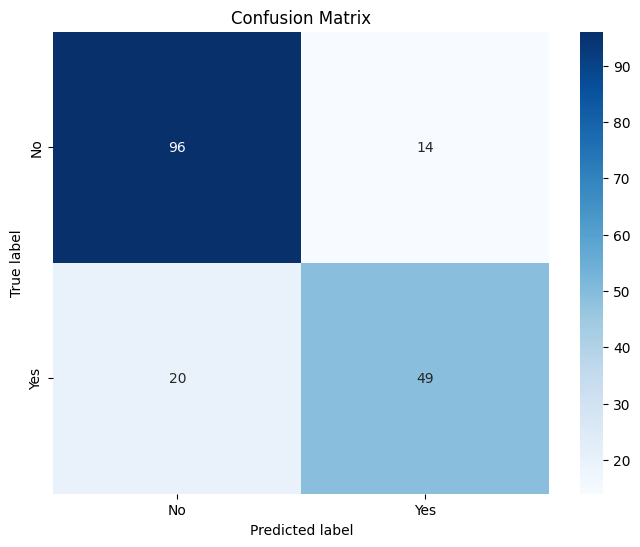

In [225]:
# Import the necessary libraries for plotting and visualization
import matplotlib.pyplot as plt  
# Matplotlib for general plotting
import seaborn as sns  
# Seaborn for enhanced visualization features

# Setting up the figure for the heatmap
plt.figure(figsize=(8, 6))  
# Specify the size of the figure (width, height in inches)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  # Labels for the x-axis (predicted labels)
            yticklabels=['No', 'Yes'])  # Labels for the y-axis (true labels
# The heatmap visually represents the values in the confusion matrix (cm)

# Set axes labels and title for the plot
plt.ylabel('True label')  # Label for the y-axis
plt.xlabel('Predicted label')  # Label for the x-axis
plt.title('Confusion Matrix')  # Title for the heatmap

# Display the plot
plt.show()  
# Render the heatmap to the screen

### Accuracy
Accuracy is a simple metric that indicates the proportion of correctly classified instances out of the total instances. 

In [226]:
# Define the counts from the confusion matrix
TP = 96  # True Positives: correctly predicted positive cases
TN = 49  # True Negatives: correctly predicted negative cases
FP = 20  # False Positives: incorrectly predicted positive cases
FN = 14  # False Negatives: incorrectly predicted negative cases

# Calculate the accuracy of the model
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Accuracy is the ratio of correctly predicted cases (TP + TN) to the total number of cases.

# Output the accuracy
accuracy

0.8100558659217877

In [227]:
# Calculate accuracy using scikit-learn's accuracy_score function
from sklearn.metrics import accuracy_score
# This is another way of finding the accuracy of the model

accuracy = accuracy_score(y_test, y_pred1)
# y_test: the true labels of the test dataset
# y_pred1: the predicted labels by the model

# Output the accuracy
accuracy

0.8100558659217877